In [339]:
import pandas as pd
pd.set_option('display.max_columns',100) # Displaying max columns present in the dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook

In [340]:
with open('whatappchat.txt',encoding='UTF-8') as f:
    pieces = [i.strip() for i in f.read().splitlines()]

In [341]:
chat=pd.DataFrame(
    re.findall(r'\[(.*?)\]\s*([^:]+):\s*(.*)', '\n'.join(pieces)),
    columns=['Time', 'Name', 'Text']
)

In [342]:
new_chat=chat.loc[11:]

In [380]:
# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=lambda x : date_regex.findall(x)

In [381]:
new_chat['date']=new_chat['Time'].apply(date)

In [382]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [383]:
new_chat['date']=new_chat['date'].apply(listToString)

In [439]:
new_chat['date']=pd.to_datetime(new_chat['date'])

In [431]:
new_chat['Word Length']=new_chat['Text'].apply(len)

In [440]:
new_chat['month']=new_chat['date'].dt.month

In [446]:
new_chat['day']=new_chat['date'].dt.day

In [480]:
# Get time
time_regex=re.compile(r'(\d{1,2}\:\d{1,2}\:\d{1,2} \w+)')
time=lambda x :time_regex.findall(x)

In [481]:
time('11/19/19, 3:45:51 PM')

['3:45:51 PM']

In [482]:
new_chat['time_']=new_chat['Time'].apply(time)

In [484]:
new_chat['time_']=new_chat['time_'].apply(listToString)

In [490]:
new_chat['time_'] = pd.to_datetime(new_chat['time_'])

In [492]:
new_chat['hours']=new_chat.time_.apply(lambda x: x.hour)

In [496]:
new_chat.head(20)

,Time,Name,Text,emoji,AM/PM,date,Word Length,month,day,hours,time_
11,"11/19/19, 3:45:51 PM",‪+91 90348 50345‬,Drive link shared for previous two sessions re...,,PM,2019-11-19,55,11.0,19.0,15.0,2020-01-28 15:45:51
12,"11/19/19, 3:49:26 PM",‪+91 82475 90372‬,Me also waiting for that,,PM,2019-11-19,24,11.0,19.0,15.0,2020-01-28 15:49:26
13,"11/19/19, 3:55:54 PM",‪+91 94378 01901‬,It will be uploaded soon and we will let you k...,,PM,2019-11-19,70,11.0,19.0,15.0,2020-01-28 15:55:54
14,"11/19/19, 3:56:42 PM",‪+91 90900 09356‬,👍,👍,PM,2019-11-19,1,11.0,19.0,15.0,2020-01-28 15:56:42
15,"11/19/19, 4:01:05 PM",‪+91 72055 31464‬,Can I please know what topics were covered in ...,,PM,2019-11-19,57,11.0,19.0,16.0,2020-01-28 16:01:05
16,"11/19/19, 4:02:13 PM",‪+91 99875 07468‬,Same here I cud t attend .. office issues,,PM,2019-11-19,41,11.0,19.0,16.0,2020-01-28 16:02:13
17,"11/19/19, 4:10:23 PM",‪+91 81054 54221‬,"I think there is ""view recordings"" section is ...",,PM,2019-11-19,117,11.0,19.0,16.0,2020-01-28 16:10:23
18,"11/19/19, 4:11:41 PM",‪+91 81054 54221‬,Only theory... Try to catch next session becau...,,PM,2019-11-19,72,11.0,19.0,16.0,2020-01-28 16:11:41
19,"11/19/19, 4:11:55 PM",‪+91 72055 31464‬,Sure sure,,PM,2019-11-19,9,11.0,19.0,16.0,2020-01-28 16:11:55
20,"11/19/19, 4:12:04 PM",‪+91 72055 31464‬,Thanks for the note,,PM,2019-11-19,19,11.0,19.0,16.0,2020-01-28 16:12:04


In [345]:
counts = round(new_chat['Name'].value_counts()[:20]/len(new_chat)*100,2)
Counts=pd.Series(counts).reset_index()

In [346]:
Counts.rename(columns={'index':'Name','Name':'Contribution in %'},inplace=True)

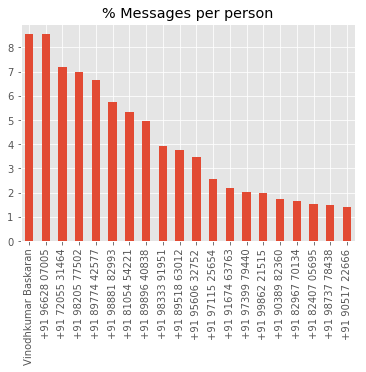

In [348]:
%matplotlib inline
fig = counts.plot("bar", title="% Messages per person")

<Figure size 720x576 with 0 Axes>

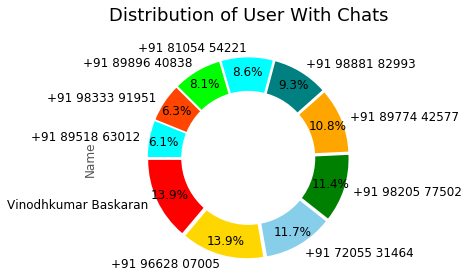

In [429]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=new_chat.groupby('Name')['Name'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

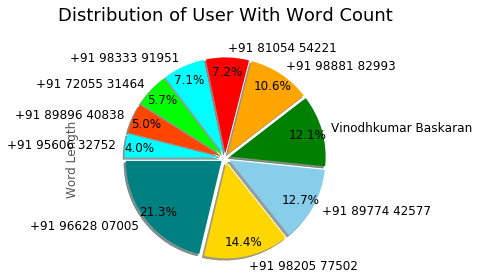

In [433]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

word_count=new_chat.groupby(['Name'])['Word Length'].sum().nlargest(10)

def pie_chart(word_count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart(word_count)

### Emoji

In [349]:
!pip install emoji

In [350]:
import emoji

def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [355]:
import collections
import emoji
new_chat["Name"].unique()
emoji_ctr = collections.Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in new_chat.iterrows():
        emojis_found = r.findall(row["Text"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

👍 - 79
🏻 - 32
😊 - 23
😂 - 18
😅 - 12
😁 - 12
😀 - 11
😜 - 7
🤣 - 7
🏼 - 5


In [357]:
new_chat['emoji']=new_chat['Text'].apply(extract_emojis)

In [358]:
print(pd.DataFrame(new_chat.groupby(['emoji']))[0].unique())

['' '☝🏼' '✌🏻' '🏫🥵' '👆' '👌' '👌😂😂😂' '👍' '👍🏻' '👍🏻✌🏻' '👍🏻👍🏻' '👍🏼' '👍👍' '👍😁'
 '👍🙏' '👏🏻👏🏻' '👑' '😀' '😁' '😁😁' '😁😁😁' '😁🙏🏻' '😂' '😂😂' '😂😂😂😂' '😃' '😃🙏' '😄😄👍🏻'
 '😅' '😅🤚🏻' '😉' '😉😎' '😊' '😊👍' '😍' '😎' '😎🤟' '😐' '😜' '😜😜' '😬' '😳' '🙄' '🙏🏻😂'
 '🤓' '🤔🤔' '🤗' '🤘🏼' '🤘🏼🤘🏼' '🤚🏻' '🤟🏻' '🤟🤟' '🤣' '🤦🏻♂' '🤧' '🤪' '🤷♂' '🥳'
 '🥳🎊🥳🤣🤣🤣🤣' '🧐']


In [359]:
emoji=new_chat.groupby('Name').count()['emoji'].reset_index()

In [360]:
emoji.sort_values('emoji', ascending=False,inplace=True)

In [361]:
emoji['emoji_dis'] = round(emoji['emoji']/sum(emoji['emoji'])*100,2)
emoji[:20]

,Name,emoji,emoji_dis
1,Vinodhkumar Baskaran,177,8.55
64,‪+91 96628 07005‬,177,8.55
27,‪+91 72055 31464‬,149,7.19
71,‪+91 98205 77502‬,145,7.00
47,‪+91 89774 42577‬,138,6.66
78,‪+91 98881 82993‬,119,5.75
32,‪+91 81054 54221‬,110,5.31
48,‪+91 89896 40838‬,103,4.97
73,‪+91 98333 91951‬,81,3.91
46,‪+91 89518 63012‬,78,3.77


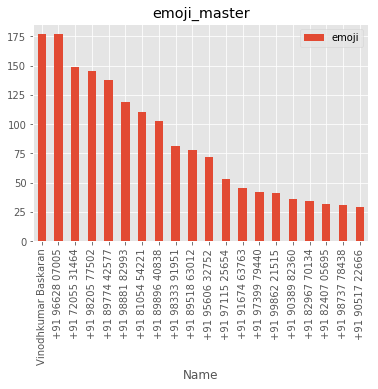

In [362]:
emoji[:20].plot('Name','emoji',kind='bar',title='emoji_master')

In [363]:
new_chat.head()

,Time,Name,Text,emoji
11,"11/19/19, 3:45:51 PM",‪+91 90348 50345‬,Drive link shared for previous two sessions re...,
12,"11/19/19, 3:49:26 PM",‪+91 82475 90372‬,Me also waiting for that,
13,"11/19/19, 3:55:54 PM",‪+91 94378 01901‬,It will be uploaded soon and we will let you k...,
14,"11/19/19, 3:56:42 PM",‪+91 90900 09356‬,👍,👍
15,"11/19/19, 4:01:05 PM",‪+91 72055 31464‬,Can I please know what topics were covered in ...,


### Time

In [364]:
def distributeByAmPm(linesText):
    # RegExp to extract Time information
    timeRegex = re.compile("(\d+(:)\d+)(\s)(\w+)")
    matches = re.findall(timeRegex, linesText)
    if(len(matches) > 0):
         return matches[0][3]
          
        


In [365]:
distributeByAmPm('11/19/19, 3:45:51 PM')

'PM'

In [366]:
new_chat['AM/PM']=new_chat['Time'].apply(distributeByAmPm)

In [367]:
active_time=new_chat[['AM/PM','Name','Text']].groupby(['AM/PM','Name']).count().reset_index()

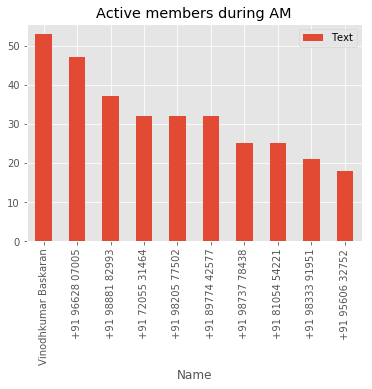

In [368]:
active_time[active_time['AM/PM']=='AM'].sort_values('Text', ascending=False)[:10].plot(x='Name',kind='bar',title='Active members during AM')

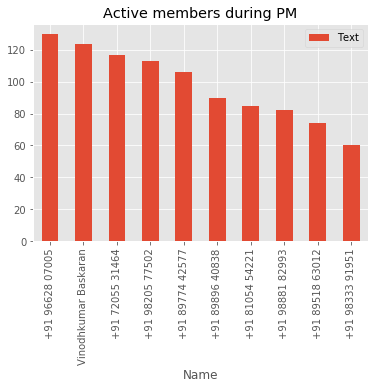

In [369]:
active_time[active_time['AM/PM']=='PM'].sort_values('Text', ascending=False)[:10].plot(x='Name',kind='bar',title='Active members during PM')

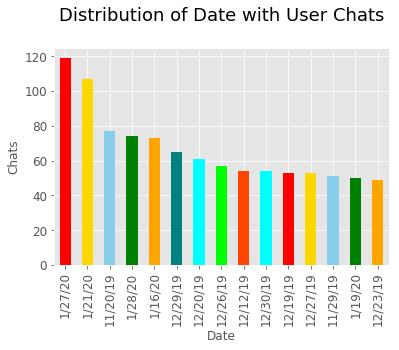

In [384]:
plt.style.use('ggplot')

days=new_chat.groupby('date')['date'].count().nlargest(15)
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

days_count=days[0:]
date_users_bar_chart(days_count)


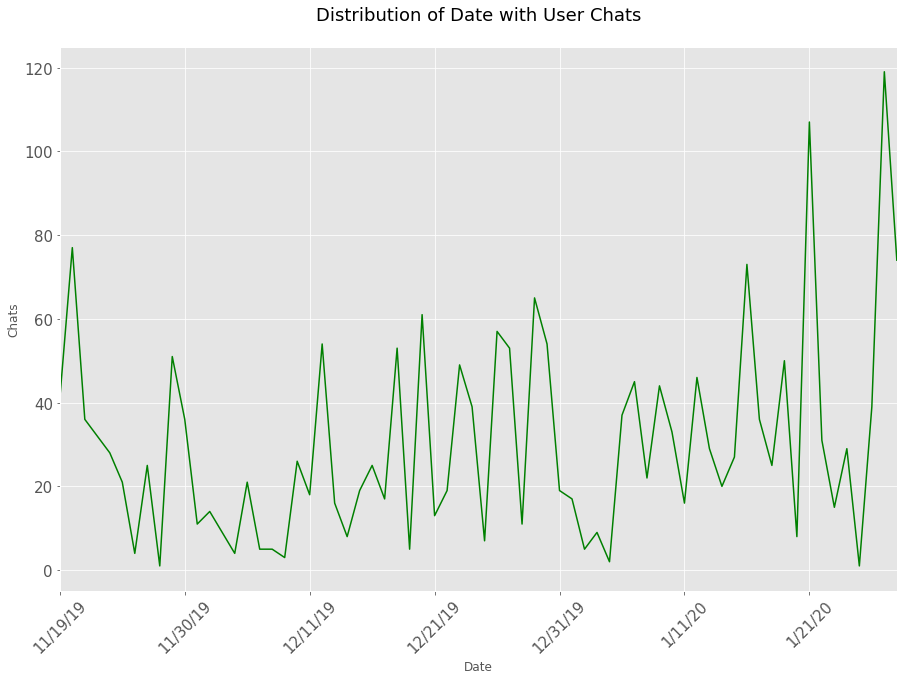

In [426]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

days=new_chat.groupby('date',sort=False)['date'].count()
def user_line_chart(date):
    plt.figure(figsize=(15,10))
    ax = date.plot(kind='line',color='green', fontsize=15)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

user_line_chart(days)

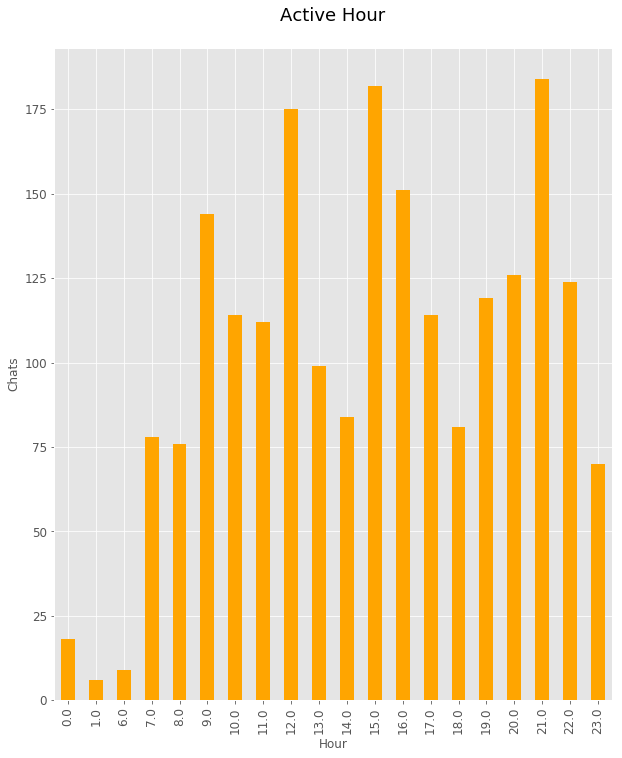

In [524]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=new_chat.groupby(['hours'])['hours'].count()
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,12))
    ax = active_hour_line_group.plot(kind='bar',color='orange', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Hour", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)

In [516]:
active_hour_line_group

hours
0.0      18
1.0       6
6.0       9
7.0      78
8.0      76
9.0     144
10.0    114
11.0    112
12.0    175
13.0     99
14.0     84
15.0    182
16.0    151
17.0    114
18.0     81
19.0    119
20.0    126
21.0    184
22.0    124
23.0     70
Name: hours, dtype: int64

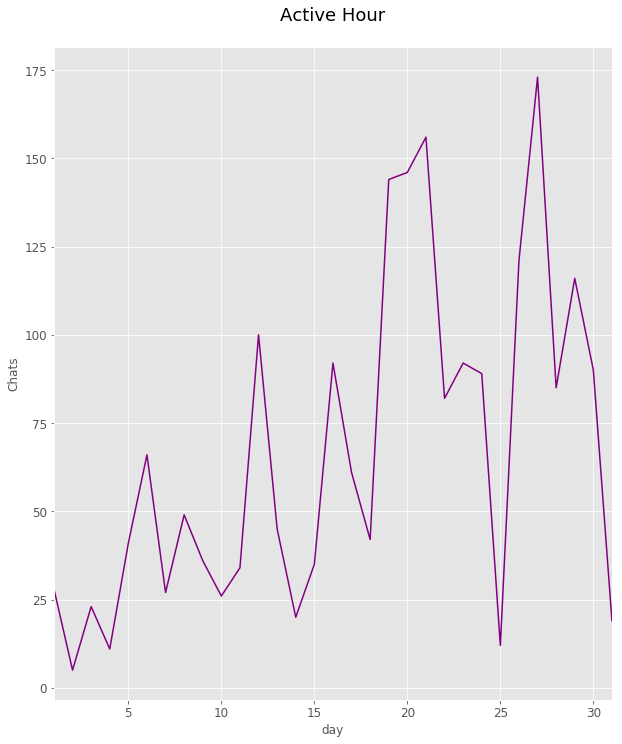

In [504]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=new_chat.groupby(['day'])['day'].count()
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,12))
    ax = active_hour_line_group.plot(kind='line',color='purple', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("day", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)

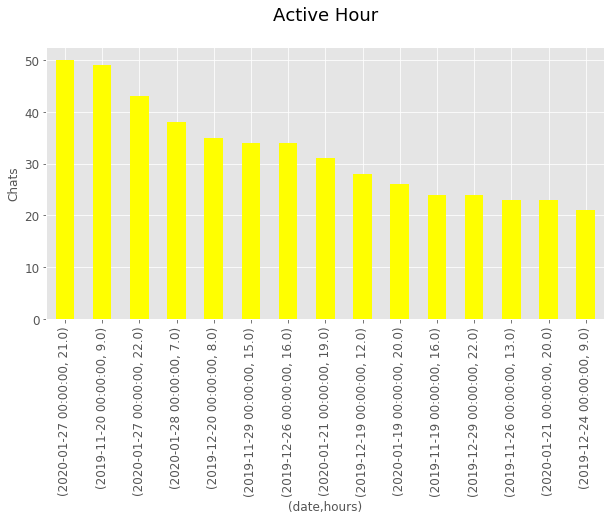

In [513]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_bar_group=new_chat.groupby(['date','hours'])['hours'].count().nlargest(15)
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,5))
    ax = active_hour_line_group.plot(kind='bar',color='yellow', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(date,hours)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_bar_group)

In [512]:
pd.DataFrame(active_hour_bar_group)

,,hours
date,hours,
2020-01-27,21.0,50
2019-11-20,9.0,49
2020-01-27,22.0,43
2020-01-28,7.0,38
2019-12-20,8.0,35
2019-11-29,15.0,34
2019-12-26,16.0,34
2020-01-21,19.0,31
2019-12-19,12.0,28
